In [335]:
%run './OMC_scan_funs_no_pandas.py'
import scipy.signal

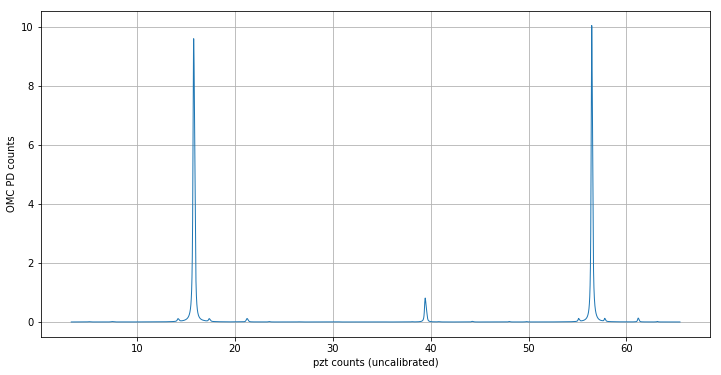

In [129]:
dc,fig = stage1('./hoak_omc.csv','./hoak_pzt.csv',keep_range=[0.05,1])

In [215]:
RFs = [9.099471e6,45.497355e6]
deltaf_x = 5.813185e+07
deltaf_y = 5.797750e+07

deltaf = deltaf_x

FSR=2.649748e+08
# RFs.pop()

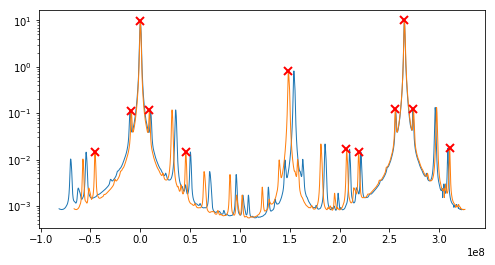

In [145]:
dc2,p,fit1= stage2(dc,verbose=True,RFs=RFs,plot=False)

In [157]:
xdata = dc2['freq']
dc3 = gen_HOM_locs(xdata)

In [158]:
dc4 = add_RF_peak_locs(dc3,RFs)

In [254]:
dc5 = gen_freq_table(xdata,RFs=RFs)

In [227]:
# dc5

In [194]:
cols = list(dc5.keys())

dc6 = {}
dc6['HOM_order'] = np.array([],dtype=int)
dc6['variable'] = np.array([],dtype=object)
dc6['value'] = np.array([],dtype=float)
maxtem = len(dc5['HOM_order']) - 1
for col in cols[1:]:
    print(col)
    dc6['HOM_order'] = np.hstack([dc6['HOM_order'],dc5['HOM_order']])
    dc6['variable'] = np.hstack([dc6['variable'],np.repeat(col,maxtem+1)])
    dc6['value'] = np.hstack([dc6['value'],dc5[col]])

0
1
2
0_RF0p
0_RF0m
1_RF0p
1_RF0m
2_RF0p
2_RF0m


In [209]:
dc6 = linearise_freq_table(dc5)

In [219]:
find_most_likely_peak(FSR+RFs[0]-3*deltaf,dc6,xdata[1]-xdata[0])

{'HOM_order': 3, 'freq': 99678721.0, 'label': '1_RF0p'}

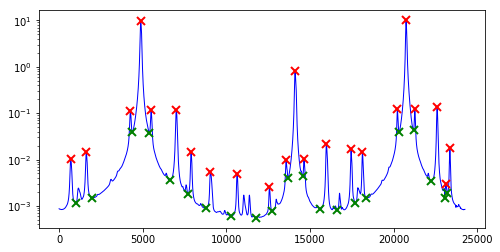

{'HOM_order': array([1, 0, 0, 0, 0, 4, 0, 8, 3, 7, 2, 2, 2, 6, 1, 0, 0, 0, 0, 4, 4, 0]),
 'freq': array([-5.81318500e+07, -4.54973550e+07, -9.09947100e+06,  0.00000000e+00,
         9.09947100e+06,  3.24474000e+07,  4.54973550e+07,  6.48948000e+07,
         9.05792500e+07,  1.23026650e+08,  1.39611629e+08,  1.48711100e+08,
         1.57810571e+08,  1.81158500e+08,  2.06842950e+08,  2.19477445e+08,
         2.55875329e+08,  2.64974800e+08,  2.74074271e+08,  2.97422200e+08,
         3.06521671e+08,  3.10472155e+08]),
 'label': array([0, '0_RF1m', '0_RF0m', 0, '0_RF0p', 1, '0_RF1p', 2, 1, 2, '1_RF0m',
        1, '1_RF0p', 2, 1, '1_RF1m', '1_RF0m', 1, '1_RF0p', 2, '2_RF0p',
        '1_RF1p'], dtype=object),
 'metric': array([1.99132714e-03, 7.63215932e-05, 1.74315768e-05, 2.11397429e-04,
        1.47835038e-04, 2.24519225e-03, 3.72479604e-04, 3.30106273e-03,
        2.20064566e-03, 2.36644302e-03, 8.46320880e-04, 1.73101785e-04,
        3.48765431e-04, 2.19071443e-04, 1.01992697e-03, 1.329

In [257]:
get_peak_labels(dc5,xdata,ydata)

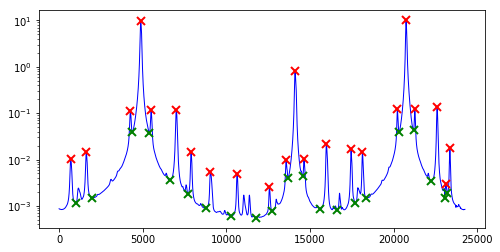

In [276]:
dc_cs = get_peak_labels(dc5,xdata,ydata)

In [281]:
def test_int(x):
    try:
        int(x)
    except:
        return False
    return True

vec_test_int = np.vectorize(test_int)
carrier_mask = vec_test_int(dc['label'])

In [282]:
dc_even = dc_cs.copy()

for key in dc_cs:
    dc_even[key] = dc_cs[key][carrier_mask]

max_confidence = 5e-3
# only keep entries less than max_confidence
confidence_mask = dc_even['metric'] < max_confidence
for key in dc_even:
    dc_even[key] = dc_even[key][confidence_mask]

In [283]:
dc_even

{'HOM_order': array([1, 0, 4, 8, 3, 7, 2, 6, 1, 0, 4]),
 'freq': array([-5.8131850e+07,  0.0000000e+00,  3.2447400e+07,  6.4894800e+07,
         9.0579250e+07,  1.2302665e+08,  1.4871110e+08,  1.8115850e+08,
         2.0684295e+08,  2.6497480e+08,  2.9742220e+08]),
 'label': array([0, 0, 1, 2, 1, 2, 1, 2, 1, 1, 2], dtype=object),
 'metric': array([0.00199133, 0.0002114 , 0.00224519, 0.00330106, 0.00220065,
        0.00236644, 0.0001731 , 0.00021907, 0.00101993, 0.00027555,
        0.00036726]),
 'peak_freq': array([-5.76041985e+07, -5.60149915e+04,  3.18524806e+07,  6.40201016e+07,
         8.99961344e+07,  1.22399602e+08,  1.48665232e+08,  1.81216548e+08,
         2.07113205e+08,  2.65047813e+08,  2.97324884e+08]),
 'peak_height': array([1.02506476e-02, 9.60055060e+00, 1.17207483e-01, 5.50387882e-03,
        4.75482988e-03, 2.53984960e-03, 8.10630840e-01, 2.15945647e-02,
        1.66086642e-02, 1.00491614e+01, 1.32600822e-01]),
 'peak_index': array([  694,  4880,  7006,  9050, 10644, 

In [309]:
# groupby HOM_order
HOM_groups = {}
HOM_bins = dc_even['HOM_order']
height_vals = dc_even['peak_height']
for HOM_bin, height_val in zip(HOM_bins, height_vals):
    if HOM_bin not in HOM_groups:
        # new bin: create group
        HOM_groups[HOM_bin] = []
    # add omc_val to the pzt_bin
    HOM_groups[HOM_bin].append(height_val)

# take mean across height_vals in the same HOM_bins
group_mean_std = HOM_groups.copy()
for HOM_bin in group_mean_std:
    group_mean_std[HOM_bin] = {}
    group_mean_std[HOM_bin]['mean'] = np.mean(HOM_groups[HOM_bin])
    group_mean_std[HOM_bin]['std'] = np.std(HOM_groups[HOM_bin])
# print(result)

dc_out = {}
dc_out['HOM_order'] = []
dc_out['peak_height'] = []
dc_out['peak_std'] = []
for HOM_bin in group_mean:
    dc_out['HOM_order'].append(HOM_bin)
    dc_out['peak_height'].append(group_mean_std[HOM_bin]['mean'])
    dc_out['peak_std'].append(group_mean_std[HOM_bin]['std'])

In [306]:
group_mean_std

{0: {'mean': 9.824856016666665, 'std': 0.2243054166666658},
 1: {'mean': 0.013429655883333332, 'std': 0.003179008283333332},
 2: {'mean': 0.81063084, 'std': 0.0},
 3: {'mean': 0.004754829883333333, 'std': 0.0},
 4: {'mean': 0.1249041525, 'std': 0.007696669500000003},
 6: {'mean': 0.021594564666666666, 'std': 0.0},
 7: {'mean': 0.0025398496, 'std': 0.0},
 8: {'mean': 0.005503878816666668, 'std': 0.0}}

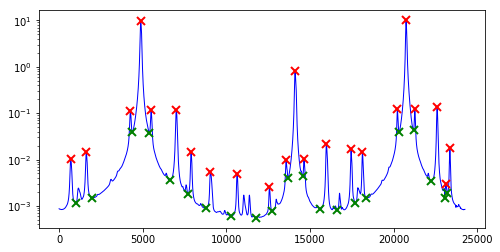

mismatch is 8.2508% +/- 0.2%


0.08250816486520149

In [336]:
stage3(xdata,ydata)